## Concrete Strength Prediction Using Machine Learning 

## Data Set

If you download this dataset, you see that several features affect the quality of concrete. So we discuss brief of each feature:

cement: a substance used for construction that hardens to other materials to bind them together.

slag: Mixture of metal oxides and silicon dioxide.

Flyash: coal combustion product that is composed of the particulates that are driven out of coal-fired boilers together with the flue gases.

Water: It is used to form a thick paste.

Superplasticizer: used in making high-strength concrete.

Coaseseaggregate: prices of rocks obtain from ground deposits.

fineaggregate: the size of aggregate small than 4.75mm.

age: Rate of gain of strength is faster to start with and the rate gets reduced with age.

csMPa: Measurement unit of concrete strength.

Now, we will import some important modules:

## Importing Modules

In [36]:
# importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing matplotlib
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sb
import seaborn as sns

In [33]:
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [26]:
df = pd.read_csv('concrete_data.csv ')
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## Study Dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Handling Null values

In [29]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [30]:
num= df.select_dtypes(include=['int64','float64']).keys()
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='mean')
impute_fit= impute.fit(df[num])
df[num]= impute_fit.transform(df[num])
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


## Exploratory Data Analysis(EDA)

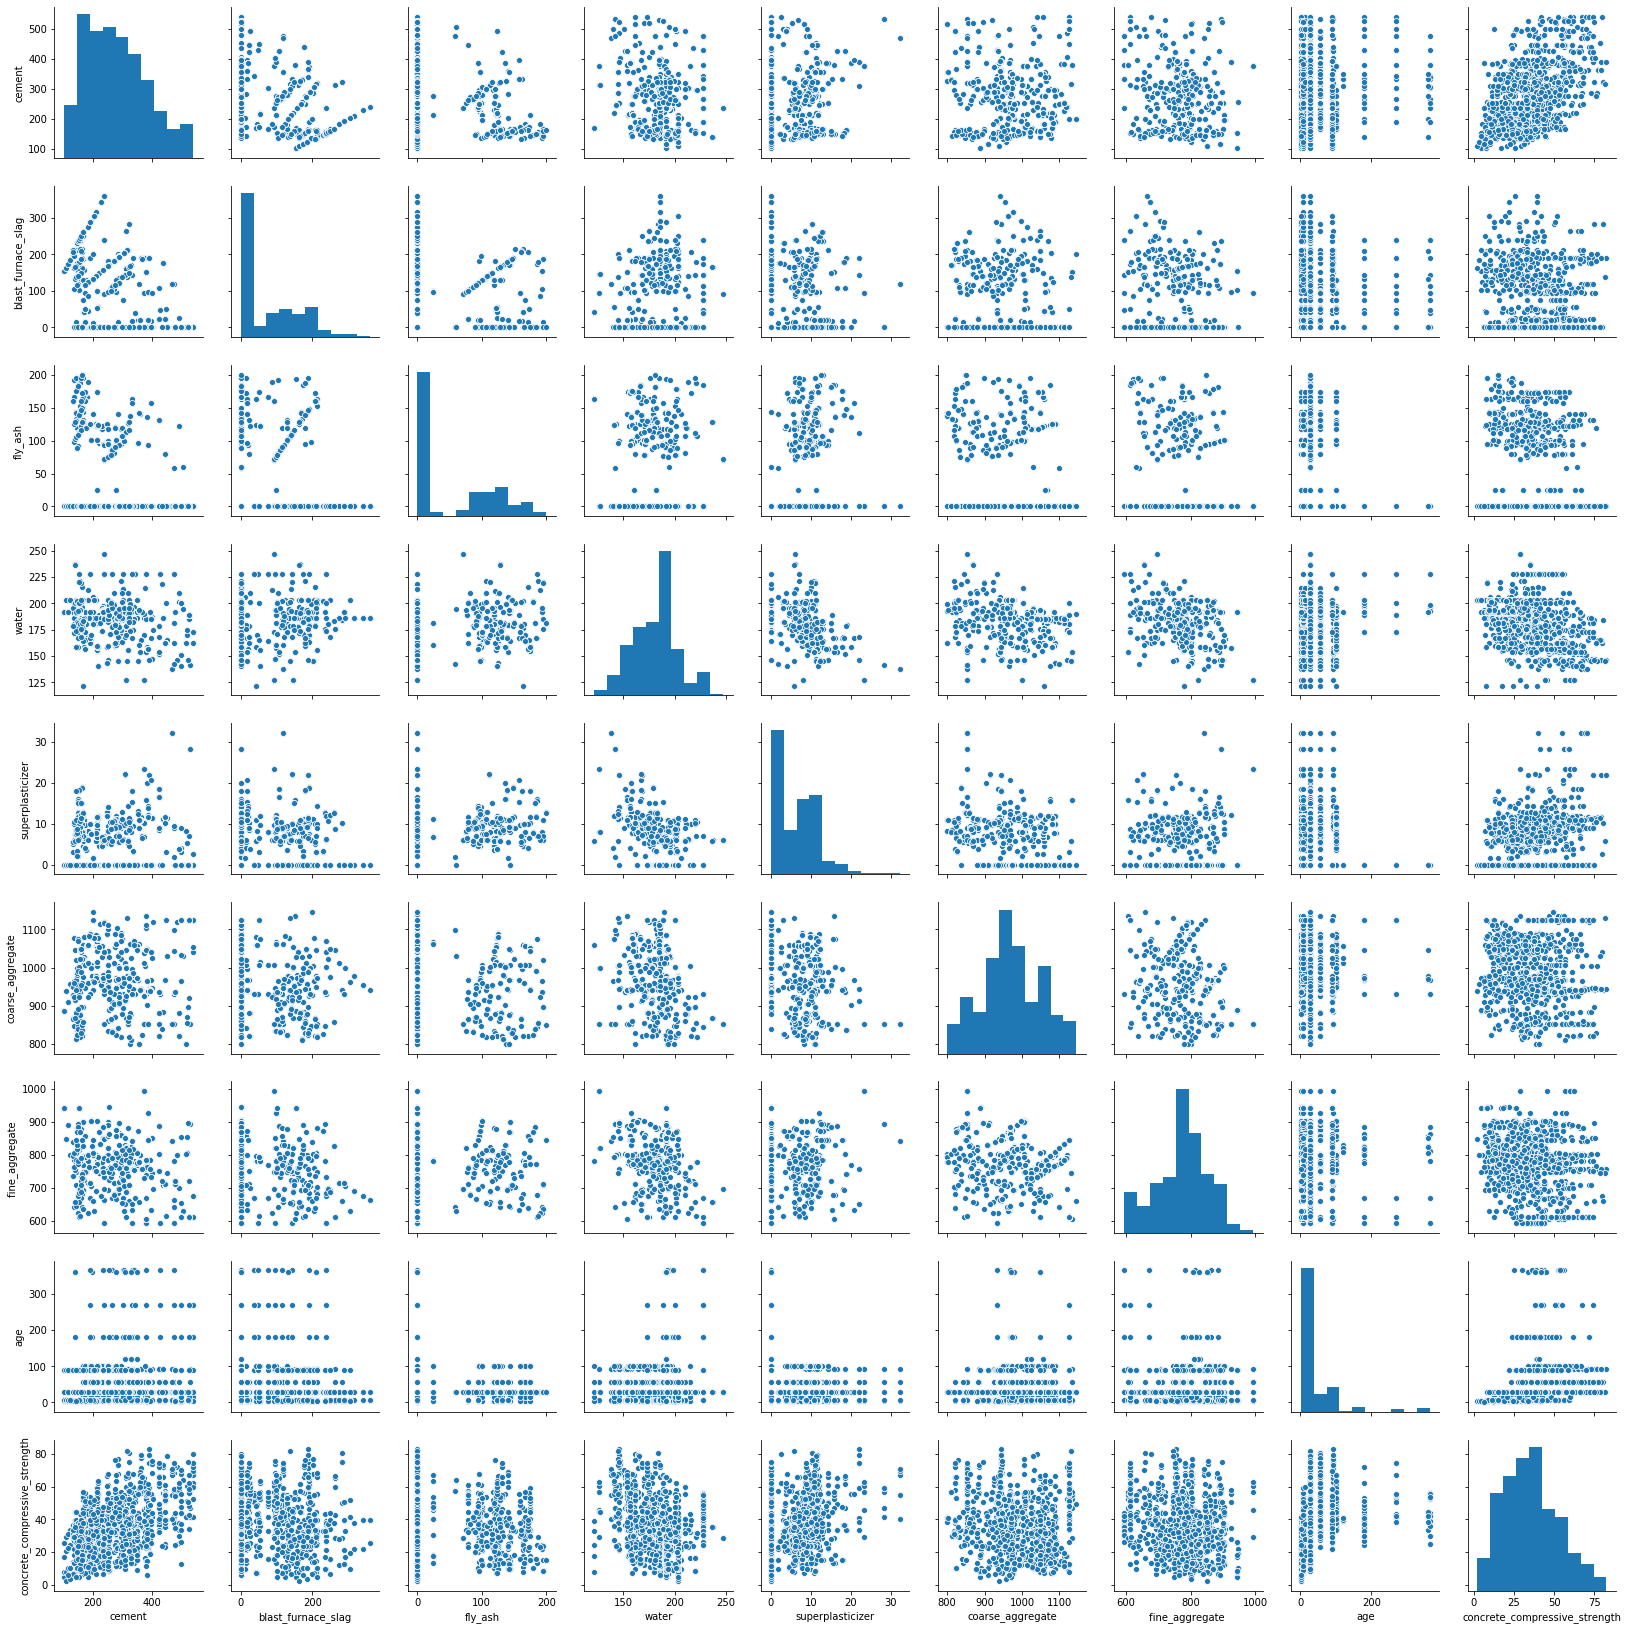

In [32]:
# pairplot of dataframe
sb.pairplot(df)

## Box Plot

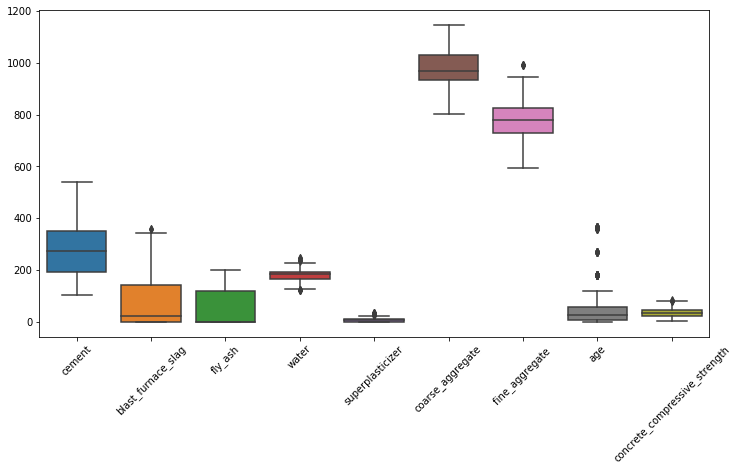

In [38]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Age column appears to be having maximum number of outliers
Slag, Water, superplastic, fineagg features have some outliers
All features except age and strength have same units(kg in m3 mixture) but have different scales. Thus we might need to scale the data so as to avoid bias in algorithms

## Distribution of independent variables

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

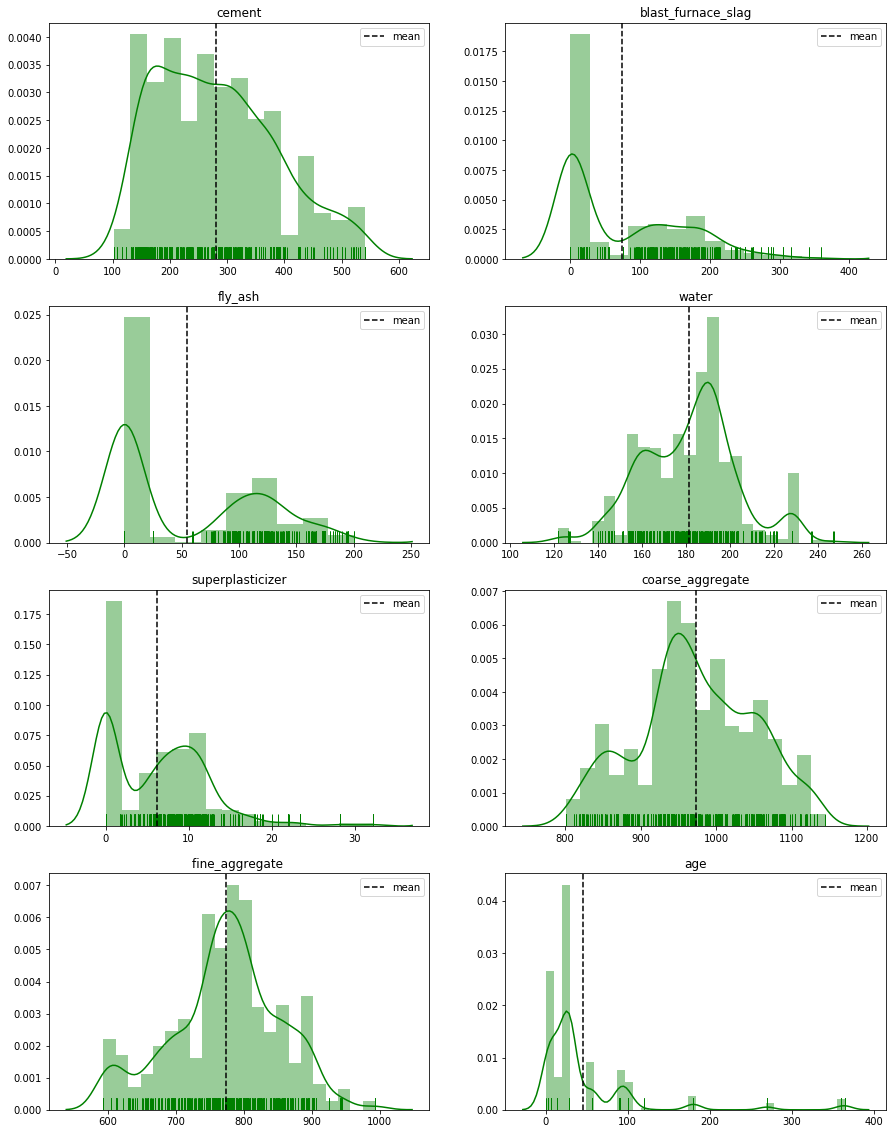

In [52]:
import itertools

cols = [i for i in df.columns if i != 'strength']

fig = plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols)-1)):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color='green',rug=True)
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

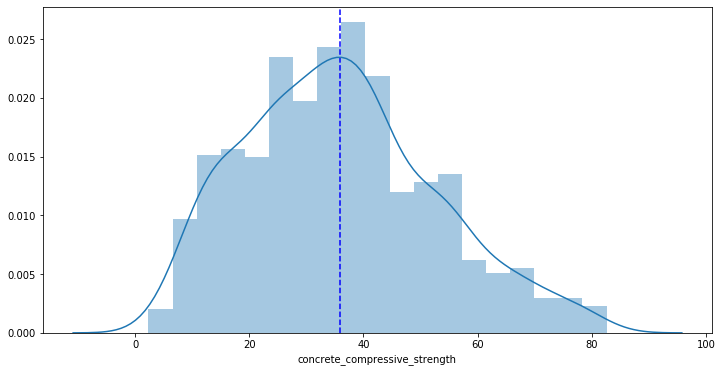

In [56]:
fig = plt.figure(figsize=(12, 6))
plt.axvline(df.concrete_compressive_strength.mean(),linestyle="dashed",label="mean", color='blue')
sns.distplot(df.concrete_compressive_strength);

Observations
Diagonal analysis + dist plots analysis
Distribution of cement appears nearly normal
Slag and ash has 2 gaussians and is skewed
Water and Superplastic have near normal distributions
Age data has long tail which confirms the presence of outliers
Strength is normally distributed
Off-diagonal analysis with strength
Cement has strong correlation with strength
Slag is a very weak predictor because the distribution is like a cloud
ash, coarseagg and fineagg are also weak predictors
Water appears to have a negative correlation with strength
Superplastic appears to have positive correlation with strength
age also has strong correlation with strength
Off-diagonal analysis between other features¶
Cement and slag have strong correlation
Water and super plastic have strong negative correlation

## Heat Map

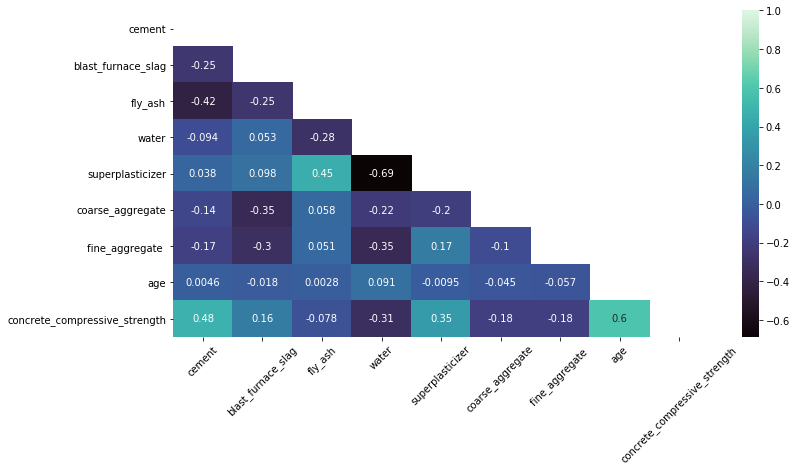

In [57]:
plt.subplots(figsize=(12, 6))
corr = df.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Observations:
As expected, cement and age have strong correlation with strength
Super plastic has mild positive correlation with strength
As expected, water and superplastic have strong correlation

## Dividing Dependent And Independent Variables

In [60]:
# independent variables
x = df.drop(['concrete_compressive_strength'],axis=1)
# dependent variables
y = df['concrete_compressive_strength']

## Splitting the data

In [61]:
# importing train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

## Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(xtrain)
xtrain_scl = Fit.transform(xtrain)
xtest_scl = Fit.transform(xtest)

## Applying model

In [72]:
# import linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
fit=lr.fit(xtrain_scl,ytrain)
score = lr.score(xtest_scl,ytest)
print('predcted score is : {}' %score)
print('..................................')
y_predict = lr.predict(xtest_scl)
print('mean_sqrd_error is ==',mean_squared_error(ytest,y_predict))
rms = np.sqrt(mean_squared_error(ytest,y_predict)) 
print('root mean squared error is == {}'.format(rms))

predcted score is : {}
..................................
mean_sqrd_error is == 109.75080797014398
root mean squared error is == 10.47620198211852


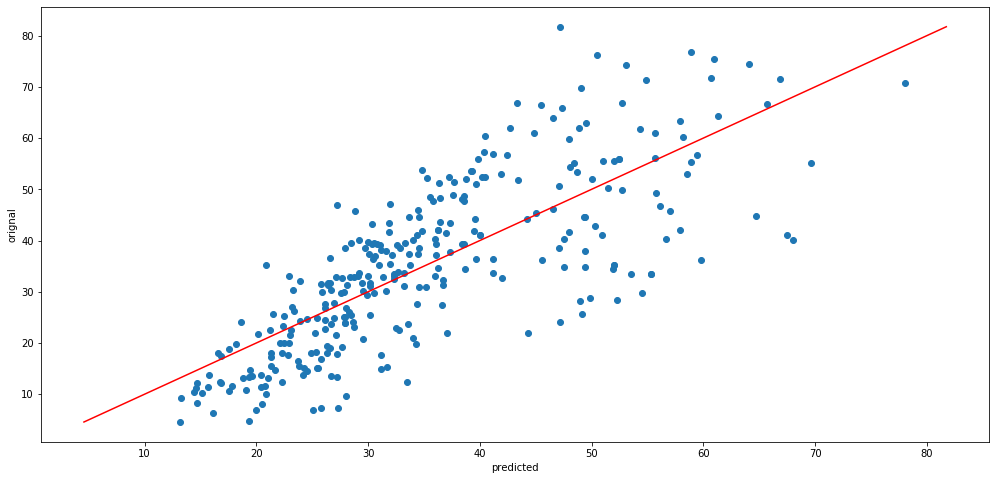

In [73]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

## Lasso and Ridge regression

In [74]:
# import rigd and lasso regresion
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
rd= Ridge(alpha=0.4)
ls= Lasso(alpha=0.3)
fit_rd=rd.fit(xtrain_scl,ytrain)
fit_ls = ls.fit(xtrain_scl,ytrain)
print('score od ridge regression is:-',rd.score(xtest_scl,ytest))
print('.......................................................')
print('score of lasso is:-',ls.score(xtest_scl,ytest))
print('mean_sqrd_roor of ridig is==',mean_squared_error(ytest,rd.predict(xtest_scl)))
print('mean_sqrd_roor of lasso is==',mean_squared_error(ytest,ls.predict(xtest_scl)))
print('root_mean_squared error of ridge is==',np.sqrt(mean_squared_error(ytest,rd.predict(xtest_scl))))
print('root_mean_squared error of lasso is==',np.sqrt(mean_squared_error(ytest,lr.predict(xtest_scl))))

score od ridge regression is:- 0.5946771295476782
.......................................................
score of lasso is:- 0.5892480040172352
mean_sqrd_roor of ridig is== 109.66993829408021
mean_sqrd_roor of lasso is== 111.13891995122194
root_mean_squared error of ridge is== 10.472341586010275
root_mean_squared error of lasso is== 10.47620198211852


## Lasso Plot

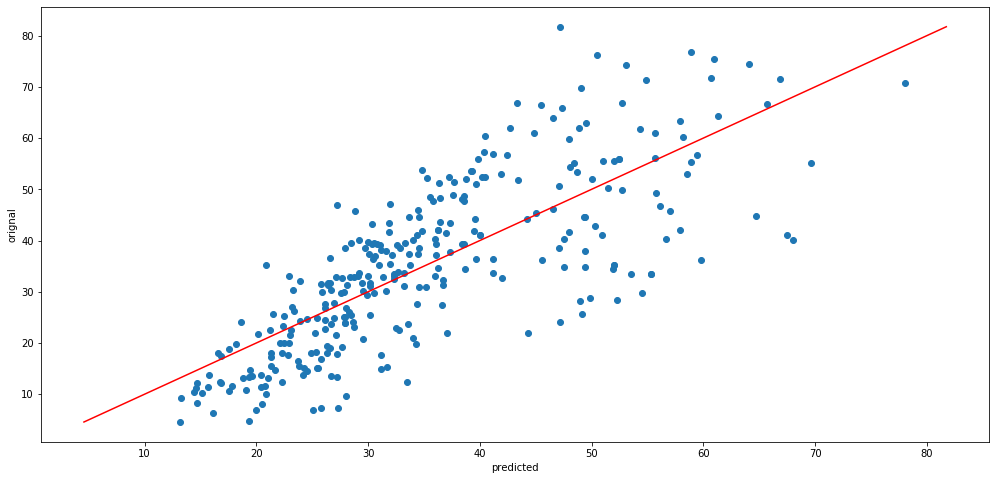

In [75]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

## Ridge Plot

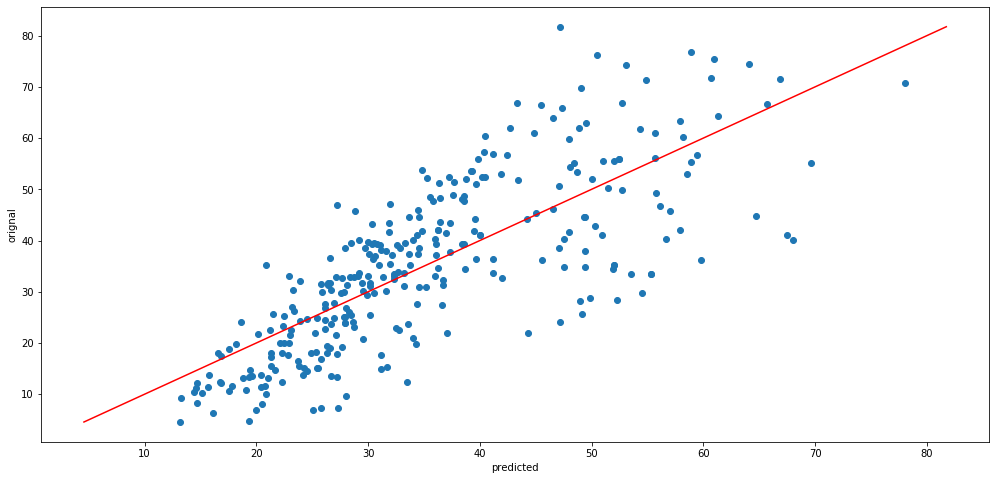

In [76]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

## RandomForestRegressor

In [77]:
# import random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rnd= RandomForestRegressor(ccp_alpha=0.0)
fit_rnd= rnd.fit(xtrain_scl,ytrain)
print('score is:-',rnd.score(xtest_scl,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,rnd.predict(xtest_scl)))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,rnd.predict(xtest_scl))))

score is:- 0.8872994247963598
........................................
mean_sqrd_error is== 30.49387544921293
root_mean_squared error of is== 5.52212598998003


## Predicted Values vs Original Values

In [78]:
x_predict = list(rnd.predict(xtest))
predicted_df = {'predicted_values': x_predict, 'original_values': ytest}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
31,56.0688,52.91
109,60.5598,55.90
136,60.5598,74.50
88,60.5471,35.30
918,52.9636,10.54
1025,60.8414,44.28
870,60.8414,23.69
318,52.9636,45.37
261,52.9636,37.40
535,50.5089,48.85


You can see that by applying the RandomForestRegressor model, the predicting values are quite similar to our original values.